In [8]:
#pip install pandas

In [9]:
#pip install matplotlib

In [10]:
#pip install seaborn

In [11]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy as sp

# 한글폰트 출력 가능 코드
#from matplotlib import rc
plt.rcParams['font.family'] = 'NanumGothic' #'Malgun Gothic'

# 마이너스 깨짐 방지
#plt.rcParams['axes.unicode_minus'] = False

In [12]:
data = pd.read_csv("../ub_dataset/경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv")
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      6 non-null      int64  
 1   발생      6 non-null      int64  
 2   검거      6 non-null      int64  
 3   검거율     6 non-null      float64
 4   살인 발생   6 non-null      int64  
 5   살인 검거   6 non-null      int64  
 6   강도 발생   6 non-null      int64  
 7   강도 검거   6 non-null      int64  
 8   강간 발생   6 non-null      int64  
 9   강간 검거   6 non-null      int64  
 10  절도 발생   6 non-null      int64  
 11  절도 검거   6 non-null      int64  
 12  폭력 발생   6 non-null      int64  
 13  폭력 검거   6 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 800.0 bytes


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
c:\Python 3.7.1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python 3.7.1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python

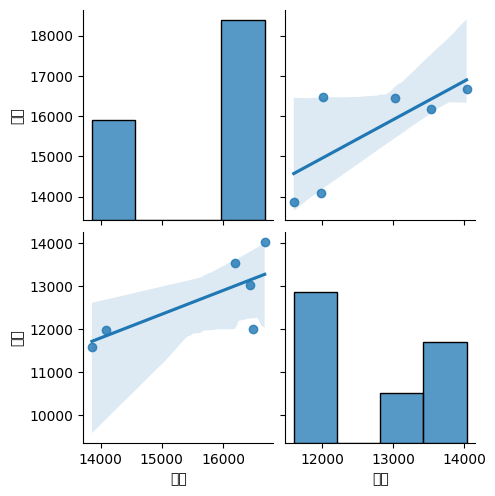

In [14]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[['발생', '검거']] #[{'발생', '검거'}]

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

## 피어슨 상관계수 구하기

In [15]:
data['발생'].sum() #np.sum(data['발생'])

93746

In [16]:
data['발생'].mean() #np.sum(data['발생'])/len(data['발생'])

15624.333333333334

In [17]:
# 평균
mu_1 = data['발생'].mean()
mu_2 = data['검거'].mean()

In [18]:
np.sum([pow(i - mu_1, 2) for i in data['발생']])

8296267.333333333

In [19]:
def sumv(x):
    result = pow(x-mu_1,2)
    return result

data['발생'].apply(sumv).sum()

8296267.333333333

In [20]:
np.sum([pow(i - mu_1, 2) for i in data['발생']])

8296267.333333333

In [21]:
#분산(잔차의 제곱 합의 평균), 표준편차(분산의 제곱근)
var_1 = np.sum([pow(i - mu_1, 2) for i in data['발생']]) / (len(data['발생']))
var_2 = np.sum([pow(i - mu_2, 2) for i in data['검거']]) / (len(data['검거']))
# 모분산 추정에서는 자유도 1로 분모에 -1을 더해줘야함.

std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

In [22]:
data['발생'] - mu_1

0   -1765.333333
1   -1530.333333
2     562.666667
3    1053.666667
4     816.666667
5     862.666667
Name: 발생, dtype: float64

In [23]:
# 공분산(표본상관계수를 구하는 것이 아니고 모집단으로 도출하므로 자유도는 0으로 설정하였음.)

covariance = sum( (data['발생'] - mu_1) * (data['검거'] - mu_2) ) / (len(data['발생']))
#표본상관계수를 구하는 것이라면 분모에서 -1 더해줘야함.

correlation = covariance / (std_1 * std_2) # 상관계수 = 공분산 / (표준편차1 * 표준편차2)

분모 발행 길이로 했는데 어차피 발행 길이나 검거 길이가 같기 때문에..

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/bea8f7bc27ce7e5ec0758f63620d11e628153b44)

![피어슨 상관계수에 사용되는 표본 공분산](https://wikimedia.org/api/rest_v1/media/math/render/svg/98bc7e1b45bb77c37ac71801db4580f3d279b4e5)

In [24]:
print(covariance)
print(correlation) #피어슨 상관계수

765218.7222222221
0.7264424782283028


## numpy

In [25]:
np.cov(data['발생'],data['검거'], ddof=0)

array([[1382711.22222222,  765218.72222222],
       [ 765218.72222222,  802485.55555556]])

In [26]:
#numpy 공분산 코드: 1행2열, 2행1열 값
covariance_np = np.cov(data['발생'],data['검거'], ddof=0)[0][1]
covariance_np

765218.7222222221

In [27]:
#분산var()가 있지만 바로 표준편차std()를 쓰면 됨
std_np_1 = np.std(data['발생'])
std_np_2 = np.std(data['검거'])

print(std_1)
print(std_np_1)

print(std_2)
print(std_np_2)


1175.8874190254023
1175.8874190254023
895.8155812194581
895.8155812194581


In [28]:
covariance_np / (std_np_1 * std_np_2) # 위와 같다.

0.7264424782283028

## 피어슨 상관계수의 scipy 코드

In [29]:
!pip install scipy

In [30]:
from scipy.stats import pearsonr

pearsonr(data['발생'], data['검거'])

#결과(0.7264424782283028, 0.10201491339487691)로 (상관계수,p-value)

(0.7264424782283028, 0.10201491339487691)

## 함수 만들기

In [31]:
def cov_pearson(data1, data2, population = True): #population(모집단) = True가 기본값
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = data1.mean()
    mu_2 = data2.mean()
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    # 모분산 추정에서는 자유도 1로 분모에 -1을 더해줘야함.

    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(data['발생'], data['검거'], True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(data['발생'], data['검거'], False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 1382711.222, COV(Y,Y) = 802485.556(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 765218.722
모집단 data에 대한 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 1659253.467, COV(y,y) = 962982.667(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : 918262.467
표본 data로 추정한 모집단의 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


## fin_stats

In [55]:
x = np.random.randint(1,50,30)
y = np.random.randint(1,50,30)
#z = np.random.randint(1,50,33)
print(x)
print(y)
#print(z)

[ 4  7  2  9 21  6 37 13 37  7 15 21 40 19  2  7 23 35 19 44 32 38 31 26
 18 25  4 43 17 21]
[34 49 21 27 32 26 14 15 43 46 36 15  5 41  5 23 17 29 21 21 22 48 13  6
 31  4  1 35 39 40]


In [56]:
list(zip(x,y))
#list(zip(x,y,z))

[(4, 34),
 (7, 49),
 (2, 21),
 (9, 27),
 (21, 32),
 (6, 26),
 (37, 14),
 (13, 15),
 (37, 43),
 (7, 46),
 (15, 36),
 (21, 15),
 (40, 5),
 (19, 41),
 (2, 5),
 (7, 23),
 (23, 17),
 (35, 29),
 (19, 21),
 (44, 21),
 (32, 22),
 (38, 48),
 (31, 13),
 (26, 6),
 (18, 31),
 (25, 4),
 (4, 1),
 (43, 35),
 (17, 39),
 (21, 40)]

In [57]:
pd.DataFrame(list(zip(x,y)), columns=['x','y'])

,x,y
0,4,34
1,7,49
2,2,21
3,9,27
4,21,32
5,6,26
6,37,14
7,13,15
8,37,43
9,7,46


## 스피어만 상관계수

In [35]:
# pip install scikit-learn

In [36]:
# (범주형-ordinal(순서형)인 것을) 수치형으로 바꿔주는 인코딩 방식 중 하나로 쓰이기도 함. 거리가 발생함

In [37]:
data.head(6)

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      6 non-null      int64  
 1   발생      6 non-null      int64  
 2   검거      6 non-null      int64  
 3   검거율     6 non-null      float64
 4   살인 발생   6 non-null      int64  
 5   살인 검거   6 non-null      int64  
 6   강도 발생   6 non-null      int64  
 7   강도 검거   6 non-null      int64  
 8   강간 발생   6 non-null      int64  
 9   강간 검거   6 non-null      int64  
 10  절도 발생   6 non-null      int64  
 11  절도 검거   6 non-null      int64  
 12  폭력 발생   6 non-null      int64  
 13  폭력 검거   6 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 800.0 bytes


In [39]:
data.describe()

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2016.500000,15624.333333,12696.333333,81.416667,27.50000,26.833333,31.166667,31.166667,629.500000,596.666667,5259.666667,3354.500000,9676.500000,8687.166667
std,1.870829,1288.120129,981.316802,4.684620,4.32435,4.445972,13.614943,13.197222,53.087663,49.750042,729.450387,327.737547,853.213397,756.154063
min,2014.000000,13859.000000,11597.000000,72.800000,22.00000,21.000000,16.000000,16.000000,577.000000,544.000000,4300.000000,2988.000000,8448.000000,7745.000000
25%,2015.250000,14617.250000,11986.000000,80.300000,25.00000,24.000000,25.500000,26.000000,587.250000,562.500000,4797.750000,3074.750000,9195.750000,8264.500000
50%,2016.500000,16314.000000,12512.000000,83.650000,26.50000,26.500000,27.500000,27.500000,615.000000,580.500000,5207.000000,3361.500000,9725.500000,8523.500000
75%,2017.750000,16475.500000,13410.000000,84.075000,31.00000,30.500000,33.250000,33.500000,673.500000,635.250000,5786.500000,3613.000000,10147.250000,9114.750000
max,2019.000000,16678.000000,14037.000000,85.000000,33.00000,32.000000,56.000000,55.000000,699.000000,665.000000,6203.000000,3740.000000,10853.000000,9841.000000


'발생'에서 min값이 13859이므로 인덱스0이 순위0이 될 수 있겠다.

In [40]:
# 스피어만 계수는 순위합으로 도출되기 때문에, 이를 직접 구현하기 위해선 ordinalencoder로 순위를 구하고 순위합을 도출해야 함
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

result = encoder.fit_transform(data[['발생', '검거']]) #값이 커질수록 순위도 커지는 듯
result

array([[0., 0.],
       [1., 1.],
       [2., 4.],
       [5., 5.],
       [3., 3.],
       [4., 2.]])

In [41]:
result = pd.DataFrame(result, columns=['발생', '검거'])
# 순위 척도의 차이를 도출하는 부분
result['diff'] = result['발생'] - result['검거']
result

,발생,검거,diff
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,2.0,4.0,-2.0
3,5.0,5.0,0.0
4,3.0,3.0,0.0
5,4.0,2.0,2.0


In [42]:
# 데이터 개수 지정
n = len(result['diff'])


In [43]:
for i in result['diff']:
    sq = pow(i,2)
    print(sq)

0.0
0.0
4.0
0.0
0.0
4.0


In [44]:
[pow(i, 2) for i in result['diff'].tolist()] #.tolist는 array를 list로 만들어주는 것

[0.0, 0.0, 4.0, 0.0, 0.0, 4.0]

In [45]:
# 스피어만 계수 산출하는 부분 (스피어만 계수 산출 공식 적용)
sum_diff = 6 * sum([pow(i, 2) for i in result['diff'].tolist()])
sum_diff

48.0

![](https://thebook.io/img/006723/348.jpg)

di = xi - yi

In [46]:
spearman = 1 - sum_diff/(n * ((n ** 2) -1))
spearman

0.7714285714285715

## 스피어만 상관계수의 scipy 코드

In [47]:
# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')


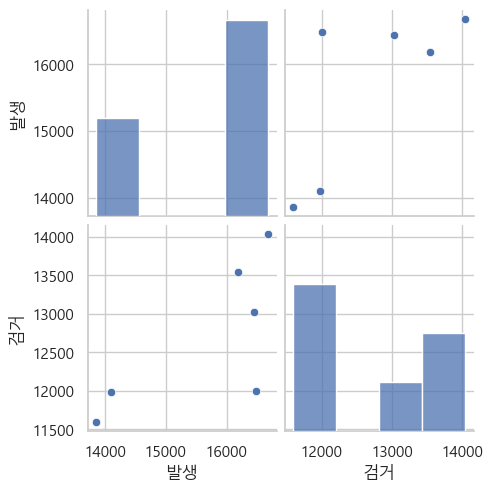

In [48]:
sns.set(font="Malgun Gothic", style='whitegrid', context='notebook')

sns.pairplot(
    data[['발생','검거']],
    height =2.5)

In [49]:
data['년도'].value_counts

<bound method IndexOpsMixin.value_counts of 0    2019
1    2018
2    2017
3    2016
4    2015
5    2014
Name: 년도, dtype: int64>

<AxesSubplot:ylabel='Density'>

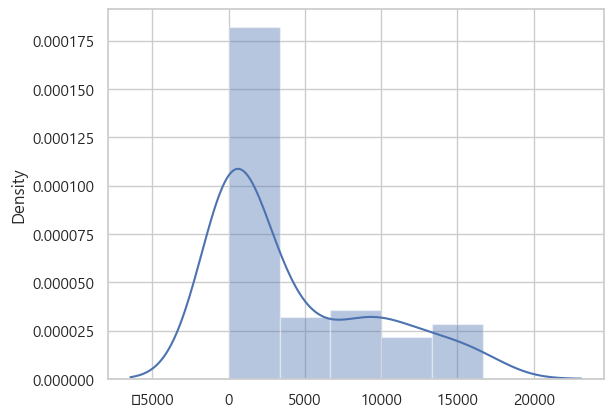

In [50]:
sns.distplot(data["발생"])

데이터가 작아서(?) 히스토그램이 안 그려진다.

In [99]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(data['발생'], data['검거'])

# 정규성을 따르지 않는 경우라는 것은 어떻게 알았을까? 정규분포를 이루는 지 확인해봐야 되지않을까?

SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)

In [101]:
# 스피어만 계수는 순위 척도를 계산한 후에는 피어슨 계수와 구하는 공식이 동일하기 때문에 위의 피어슨 계수에 이를 입력하여도 동일한 결과를 가져옴
# 따라서 밑에는 피어슨 계수로 값이 출력되었지만, 사실은 스피어만 계수임 (따라서 공분산 값과 분산은 확인하지 않아도 됨)
cov_pearson(result['발생'], result['검거'], True)

print('\n스피어만 계수와 비교')
cov_pearson(data['발생'], data['검거'], True)

모집단 data 각각의 분산 값은 COV(X,X) = 2.917, COV(Y,Y) = 2.917(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 2.25
모집단 data에 대한 피어슨 상관계수 값 : 0.771
Scipy로 구한 피어슨 상관계수는 0.771입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 7.24%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

스피어만 계수와 비교
모집단 data 각각의 분산 값은 COV(X,X) = 1382711.222, COV(Y,Y) = 802485.556(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 765218.722
모집단 data에 대한 피어슨 상관계수 값 : 0.726
Scipy로 구한 피어슨 상관계수는 0.726입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 10.201%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


주석: 위의 문단 피어슨 상관계수 값이 아니라 스피어만 계수라는 말

p-value 값이 다행히 스피어만 계수에서 내려갔다. 그렇지만 5% 보다 큼 ..
스피어만과 피어슨 상관계수 비슷하다.

In [4]:
import numpy as np
import pandas as pd

In [5]:
# 랜덤한 데이터 형성 (시드 부여)
np.random.seed(2022)

x1 = np.random.randint(1,20,10)
y1 = np.random.randint(1,20,10)

print('x1 :',x1)
print('y1 :',y1)

sample1 = pd.DataFrame(list(zip(x1,y1)), columns=['x','y'])
print('\nsmaple1 dataframe은 다음과 같습니다.')
sample1

x1 : [14 17 18 18 17 19 17 10  2 12]
y1 : [ 9 12 17  7  9 15 17 12  2  3]

smaple1 dataframe은 다음과 같습니다.


,x,y
0,14,9
1,17,12
2,18,17
3,18,7
4,17,9
5,19,15
6,17,17
7,10,12
8,2,2
9,12,3


In [ ]:
sample1['rank_x'] = pd.DataFrame(sample1['x'].rank()) 
#rank는 ordinalencoder와 마찬가지로 오름차순. 다른 게 
# x의 값이 같은 것들로 순위가 .x몇도 보인다.
sample1['rank_y'] = pd.DataFrame(sample1['y'].rank())
sample1['diff'] = sample1['rank_x'] - sample1['rank_y']
sample1['d^2'] = sample1['diff'] ** 2

sample1

In [ ]:
n = len(sample1['d^2'])
sq_distance = 6 * sample1['d^2'].sum()
spearman = 1 - sq_distance / (n * ( n ** 2 - 1))
spearman

In [7]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(sample1['x'], sample1['y'])

SpearmanrResult(correlation=0.5559113444061977, pvalue=0.09519504230496476)

In [6]:
sample1[{'x','y'}].corr(method='spearman')

,y,x
y,1.000000,0.555911
x,0.555911,1.000000
